**NORMAL TASK**
**EMAIL SPAM DETECTION**

**IMPORT LIBRARIES**

In [61]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
# Import the pandas library and read the breast cancer data from a CSV file.
df = pd.read_csv("C:/Users/Admin/Downloads/spam.csv",header = 0)
# Display the first 5 rows of the DataFrame.
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.shape

(5572, 2)

In [17]:
df.columns

Index(['Category', 'Message'], dtype='object')

SPAM--> 0
HAM --> 1

**DATA VISUALIZATION**

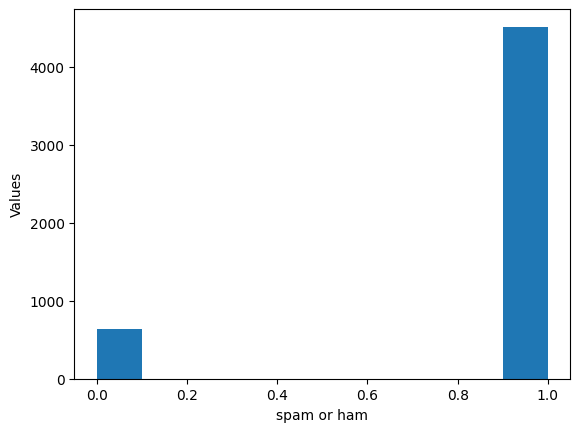

In [75]:
# histogram plot
plt.hist(df['Category'])
plt.xlabel('spam or ham')
plt.ylabel('Values')
plt.show()


**DATA PREPROCESSING**

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(5157, 2)

In [20]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [23]:
# label spam mail as 0;  ham mail as 1;

df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

In [26]:
# separating the data as texts and label

X = df['Message']

Y = df['Category']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [28]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(4125,)
(1032,)


**TfidfVectorization**

In [36]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [39]:
print(X_train_features)

  (0, 6692)	0.48303813512243965
  (0, 6605)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2400)	0.4689535663823655
  (1, 1592)	0.5594126567616489
  (1, 5859)	0.5964494866231046
  (1, 6492)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6835)	0.24488128414489752
  (2, 5064)	0.22967525805125708
  (2, 7355)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2564)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4393)	0.24488128414489752
  (2, 4520)	0.24488128414489752
  (2, 4519)	0.24488128414489752
  (2, 4084)	0.2644704778405301
  (2, 6828)	0.13848562282513652
  (2, 3252)	0.18176623831152225
  (2, 3695)	0.21568440262445418
  (2, 4522)	0.2363176943466334
  (2, 4089)	0.2196593047164816
  :	:
  (4120, 1223)	0.5846719438819551
  (4120, 6456)	0.4751891362657192
  (4120, 3181)	0.4285103741434733
  (4120, 3921)	0.39220487670240334
  (4120, 2101)	0.30807173962343376
  (4121, 5968)	0.4786671802830861
  (

In [37]:
print(X_train)

1786                   I dun believe u. I thk u told him.
3576    And do you have any one that can teach me how ...
420     Send a logo 2 ur lover - 2 names joined by a h...
5156    Sir, I need Velusamy sir's date of birth and c...
3354    I emailed yifeng my part oredi.. Can ü get it ...
                              ...                        
809          I am taking half day leave bec i am not well
993     Up to ü... Ü wan come then come lor... But i d...
1726    You know there is. I shall speak to you in  &l...
3525    Yeah that'd pretty much be the best case scenario
1748                     I think u have the wrong number.
Name: Message, Length: 4125, dtype: object


In [14]:
print(X_train)

  (0, 5687)	1
  (0, 6888)	3
  (0, 7474)	1
  (0, 258)	1
  (0, 7396)	1
  (0, 7437)	1
  (0, 7471)	1
  (0, 6773)	1
  (0, 354)	1
  (0, 2805)	1
  (0, 7555)	1
  (0, 2106)	1
  (0, 1271)	1
  (0, 3364)	1
  (0, 5980)	1
  (0, 6460)	1
  (0, 694)	1
  (0, 2568)	1
  (0, 5999)	1
  (1, 7471)	1
  (1, 3369)	1
  (1, 6304)	1
  (1, 4854)	1
  (1, 4976)	1
  (1, 3603)	1
  :	:
  (4452, 7535)	1
  (4452, 2502)	1
  (4452, 7519)	1
  (4453, 1606)	1
  (4453, 6303)	1
  (4453, 4129)	1
  (4453, 3997)	1
  (4454, 2984)	1
  (4454, 3351)	1
  (4454, 5584)	1
  (4454, 5321)	1
  (4454, 6309)	1
  (4454, 6308)	1
  (4455, 6904)	1
  (4455, 4812)	1
  (4455, 3812)	1
  (4455, 5996)	1
  (4456, 3712)	1
  (4456, 3841)	1
  (4456, 2294)	1
  (4456, 3339)	1
  (4456, 5895)	1
  (4456, 6666)	1
  (4456, 6268)	1
  (4456, 4660)	1


In [44]:
Y_train

1786    1
3576    1
420     0
5156    1
3354    1
       ..
809     1
993     1
1726    1
3525    1
1748    1
Name: Category, Length: 4125, dtype: int32

**BUILDING MODEL**

**DECISION TREE**

In [50]:
# Create a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_features, Y_train)
y_pred = dt.predict(X_test_features)



In [73]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_6828 <= 0.06
|   |--- feature_1743 <= 0.07
|   |   |--- feature_2866 <= 0.08
|   |   |   |--- feature_7330 <= 0.07
|   |   |   |   |--- feature_3867 <= 0.09
|   |   |   |   |   |--- feature_4389 <= 0.06
|   |   |   |   |   |   |--- feature_300 <= 0.08
|   |   |   |   |   |   |   |--- feature_5804 <= 0.08
|   |   |   |   |   |   |   |   |--- feature_630 <= 0.11
|   |   |   |   |   |   |   |   |   |--- feature_5500 <= 0.11
|   |   |   |   |   |   |   |   |   |   |--- feature_5358 <= 0.16
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 56
|   |   |   |   |   |   |   |   |   |   |--- feature_5358 >  0.16
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_5500 >  0.11
|   |   |   |   |   |   |   |   |   |   |--- feature_6255 <= 0.07
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- feature_6255 >  0.07
|   

In [51]:
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

report = classification_report(Y_test, y_pred)
print("Classification Report:\n", report)

Test Accuracy: 0.9525193798449613
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82       139
           1       0.97      0.98      0.97       893

    accuracy                           0.95      1032
   macro avg       0.91      0.88      0.89      1032
weighted avg       0.95      0.95      0.95      1032



**LOGISITC REGRESSION**

In [58]:
#LOGISITC REGRESSION
model = LogisticRegression()

In [59]:
model.fit(X_train_features, Y_train)
y_pred1 = dt.predict(X_test_features)

In [60]:
accuracy = accuracy_score(Y_test, y_pred1)
print("Test Accuracy:", accuracy)

report = classification_report(Y_test, y_pred1)
print("Classification Report:\n", report)

Test Accuracy: 0.9525193798449613
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82       139
           1       0.97      0.98      0.97       893

    accuracy                           0.95      1032
   macro avg       0.91      0.88      0.89      1032
weighted avg       0.95      0.95      0.95      1032



**NAIVE BAYES**

In [62]:
#  Naive Bayes model
modelnb = MultinomialNB()
modelnb.fit(X_train_features,Y_train)
y_pred2 = modelnb.predict(X_test_features)

In [63]:
accuracy = accuracy_score(Y_test, y_pred2)
print("Test Accuracy:", accuracy)

report = classification_report(Y_test, y_pred2)
print("Classification Report:\n", report)

Test Accuracy: 0.9602713178294574
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83       139
           1       0.96      1.00      0.98       893

    accuracy                           0.96      1032
   macro avg       0.98      0.85      0.90      1032
weighted avg       0.96      0.96      0.96      1032



naive bayes has higher accuracy compared to decision tree and logisitic regression